<a href="https://colab.research.google.com/github/Peeeeng/BigData-Project/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

연도별 TOP 5 인기 장르

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Colab 환경에서 한글 깨짐 방지)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

# ----------------------------------------------------
# 1. Google Drive 마운트 또는 파일 업로드 (선택)
# Colab 왼쪽에 있는 '파일' 아이콘을 클릭하여 직접 파일을 업로드하거나,
# Google Drive에 저장된 경우 아래 코드를 사용하여 마운트합니다.
# from google.colab import drive
# drive.mount('/content/drive')
# file_path = '/content/drive/MyDrive/steam_cleaned (3).csv'
# ----------------------------------------------------

# 파일 경로 지정 (일반적으로 Colab에 직접 업로드하면 이 경로로 사용)
file_path = 'steam_cleaned (3).csv'

# 데이터 로드
try:
    df = pd.read_csv(file_path)
    print("데이터 로드 완료.")
except FileNotFoundError:
    print(f"오류: 파일을 찾을 수 없습니다. 경로를 확인해주세요: {file_path}")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 'main_genre' 열의 대괄호를 제거하고 리스트 형태로 변환 (전처리 과정에 따라 다를 수 있음)
# 만약 main_genre가 이미 리스트 형태라면 이 코드는 건너뜁니다.
try:
    df['main_genre'] = df['main_genre'].str.strip("[]").str.replace("'", "").str.split(', ')
    # 첫 번째 요소만 'main_genre'로 사용
    df['main_genre'] = df['main_genre'].apply(lambda x: x[0])
except:
    # 이미 잘 처리된 경우를 대비
    print("'main_genre' 열 처리 건너뜀 (이미 처리되었거나 형식이 다름).")

# 분석에 필요한 열 선택
df_analysis = df[['year', 'main_genre', 'total_reviews']].copy()

# 'year'를 정수형으로 변환 (만약을 위해)
df_analysis['year'] = pd.to_numeric(df_analysis['year'], errors='coerce').astype('Int64')

# 유효하지 않은 데이터 제거
df_analysis.dropna(subset=['year', 'main_genre', 'total_reviews'], inplace=True)
df_analysis = df_analysis[df_analysis['total_reviews'] > 0]
df_analysis = df_analysis[df_analysis['year'] >= 2012] # 의미있는 분석을 위해 최근 연도로 제한

# 연도(year)와 장르(main_genre)별 총 리뷰 수(total_reviews) 합계 계산
genre_yearly_sum = df_analysis.groupby(['year', 'main_genre'])['total_reviews'].sum().reset_index()

print("\n연도별 장르 합계 데이터의 일부:")
print(genre_yearly_sum.head())


연도별 장르 합계 데이터의 일부:
   year            main_genre  total_reviews
0  2012                                 3358
1  2012                Action       10392450
2  2012             Adventure         273290
3  2012  Animation & Modeling             85
4  2012                Casual          10441


In [ ]:
# 각 연도별로 total_reviews를 기준으로 내림차순 정렬 후 상위 5개 장르 선택
top_genres_yearly = genre_yearly_sum.sort_values(['year', 'total_reviews'], ascending=[True, False])
top_genres_yearly = top_genres_yearly.groupby('year').head(5).reset_index(drop=True)

print("\n연도별 TOP 5 장르 데이터의 일부:")
print(top_genres_yearly.head(15))


연도별 TOP 5 장르 데이터의 일부:
    year  main_genre  total_reviews
0   2012      Action       10392450
1   2012       Indie         959553
2   2012   Adventure         273290
3   2012         RPG         124502
4   2012    Strategy          78634
5   2013      Action        6805502
6   2013       Indie         465581
7   2013   Adventure         438945
8   2013    Strategy         314226
9   2013  Simulation         217565
10  2014      Action        3297320
11  2014   Adventure         576318
12  2014       Indie         457076
13  2014      Casual         243649
14  2014  Simulation         144269


/tmp/ipython-input-1011601685.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1011601685.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1011601685.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1011601685.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1011601685.py:16: FutureWarning: 

Passin

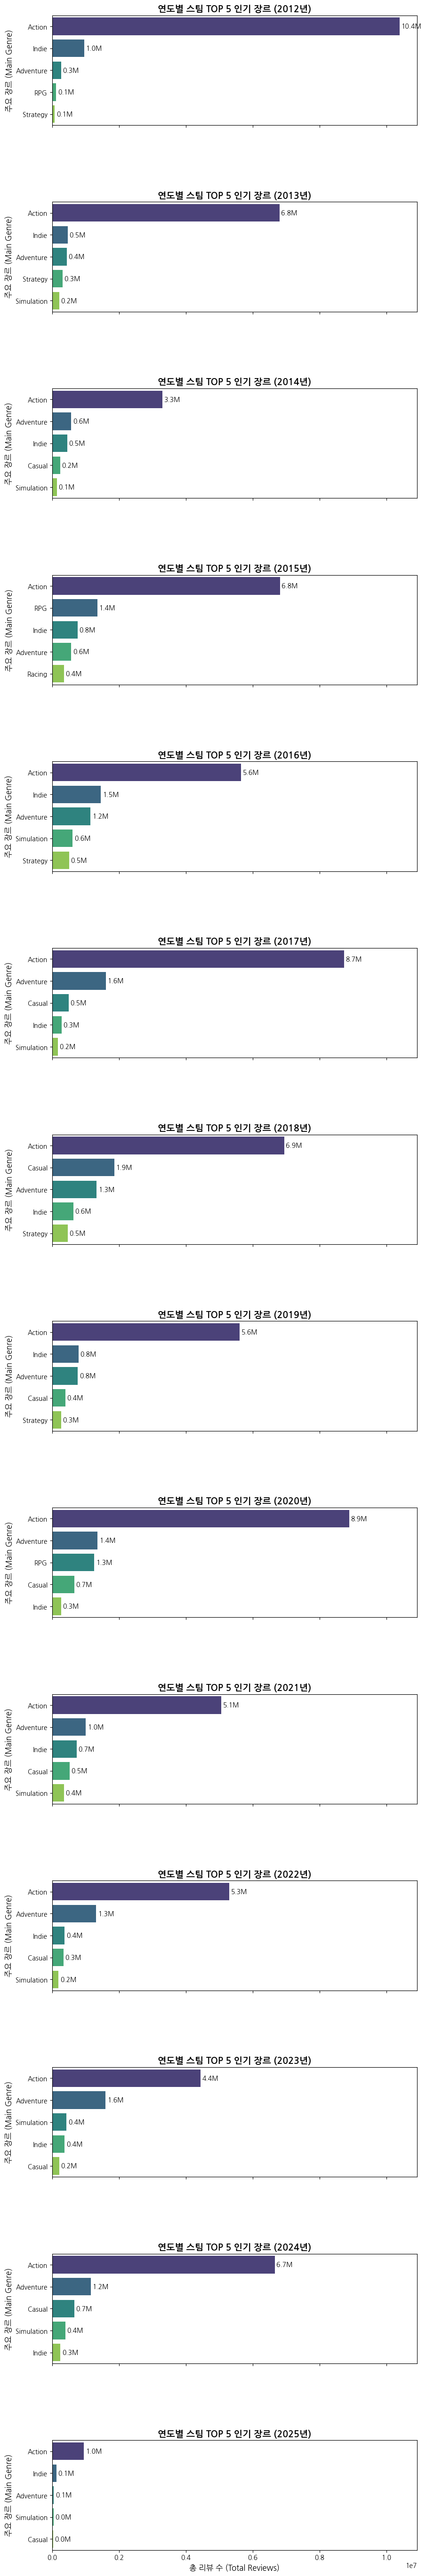

In [ ]:
# 4. 시각화 (막대 그래프) - 수정된 코드

# 시각화를 위한 준비
years = top_genres_yearly['year'].unique()
num_years = len(years)

# 서브플롯 설정
fig, axes = plt.subplots(nrows=num_years, ncols=1, figsize=(10, 5 * num_years), sharex=True)
plt.subplots_adjust(hspace=0.7) # 그래프 간격 확대 (제목 및 레이블 공간 확보)

# 각 연도별로 막대 그래프 그리기
for i, year in enumerate(years):
    data = top_genres_yearly[top_genres_yearly['year'] == year].sort_values(by='total_reviews', ascending=False).reset_index(drop=True)

    # Seaborn을 사용하여 막대 그래프 생성
    sns.barplot(
        x='total_reviews',
        y='main_genre',
        data=data,
        ax=axes[i],
        palette='viridis'
    )

    # 제목 및 축 레이블 설정
    axes[i].set_title(f'연도별 스팀 TOP 5 인기 장르 ({year}년)', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('총 리뷰 수 (Total Reviews)', fontsize=12)
    axes[i].set_ylabel('주요 장르 (Main Genre)', fontsize=12)

    # 그래프에 값 표시 (수정된 부분)
    for j, row in data.iterrows():
        # j는 현재 행의 인덱스이며, 이것이 y축의 막대 위치와 일치합니다.
        axes[i].text(
            row['total_reviews'] + 50000, # x 좌표 (막대 끝에서 오른쪽으로 약간 이동)
            j,                             # y 좌표 (막대의 중앙에 위치하도록 인덱스 사용)
            f'{row["total_reviews"] / 1000000:.1f}M', # M(백만) 단위로 표시
            va='center',                   # 수직 정렬: 중앙
            fontsize=10
        )

    # x축 눈금 형식 조정 (옵션: 숫자가 너무 커서 보기 불편할 때)
    # axes[i].ticklabel_format(style='plain', axis='x') # 과학적 표기법 끄기

plt.show()
print("")

연도별 신작 TOP 5 인기 장르

In [ ]:
# ----------------------------------------------------
# 2. 데이터 준비 및 집계 (peak_ccu 기준)
# ----------------------------------------------------
import pandas as pd
# df 변수에 데이터가 로드되어 있어야 합니다. (1단계 코드 실행 후)

df_analysis_ccu = df[['year', 'main_genre', 'peak_ccu']].copy()

# 'year'와 'peak_ccu'를 정수형으로 변환
df_analysis_ccu['year'] = pd.to_numeric(df_analysis_ccu['year'], errors='coerce').astype('Int64')
df_analysis_ccu['peak_ccu'] = pd.to_numeric(df_analysis_ccu['peak_ccu'], errors='coerce').astype('Int64')


# 유효하지 않은 데이터 제거
df_analysis_ccu.dropna(subset=['year', 'main_genre', 'peak_ccu'], inplace=True)
df_analysis_ccu = df_analysis_ccu[df_analysis_ccu['peak_ccu'] > 0]
df_analysis_ccu = df_analysis_ccu[df_analysis_ccu['year'] >= 2012]

# 연도(year)와 장르(main_genre)별 총 최고 동시 접속자 수(peak_ccu) 합계 계산
genre_yearly_ccu_sum = df_analysis_ccu.groupby(['year', 'main_genre'])['peak_ccu'].sum().reset_index()

print("\n연도별 장르 합계 데이터의 일부 (peak_ccu 기준):")
print(genre_yearly_ccu_sum.head())


연도별 장르 합계 데이터의 일부 (peak_ccu 기준):
   year    main_genre  peak_ccu
0  2012                      14
1  2012        Action   1237340
2  2012     Adventure      1006
3  2012        Casual        24
4  2012  Free To Play         1


In [ ]:
# ----------------------------------------------------
# 3. 연도별 TOP 5 인기 장르 추출 (peak_ccu 기준)
# ----------------------------------------------------

# 각 연도별로 peak_ccu를 기준으로 내림차순 정렬 후 상위 5개 장르 선택
top_genres_yearly_ccu = genre_yearly_ccu_sum.sort_values(['year', 'peak_ccu'], ascending=[True, False])
top_genres_yearly_ccu = top_genres_yearly_ccu.groupby('year').head(5).reset_index(drop=True)

print("\n연도별 TOP 5 장르 데이터의 일부 (peak_ccu 기준):")
print(top_genres_yearly_ccu.head(15))


연도별 TOP 5 장르 데이터의 일부 (peak_ccu 기준):
    year             main_genre  peak_ccu
0   2012                 Action   1237340
1   2012                  Indie     45863
2   2012                    RPG      2256
3   2012  Massively Multiplayer      1939
4   2012              Adventure      1006
5   2013                 Action    722253
6   2013                  Indie     25055
7   2013             Simulation     22522
8   2013               Strategy     14184
9   2013              Adventure      4080
10  2014                 Action     63974
11  2014  Massively Multiplayer     17980
12  2014                  Indie     15474
13  2014             Simulation      4449
14  2014              Adventure      3169


/tmp/ipython-input-4290923077.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4290923077.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4290923077.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4290923077.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4290923077.py:21: FutureWarning: 

Passin

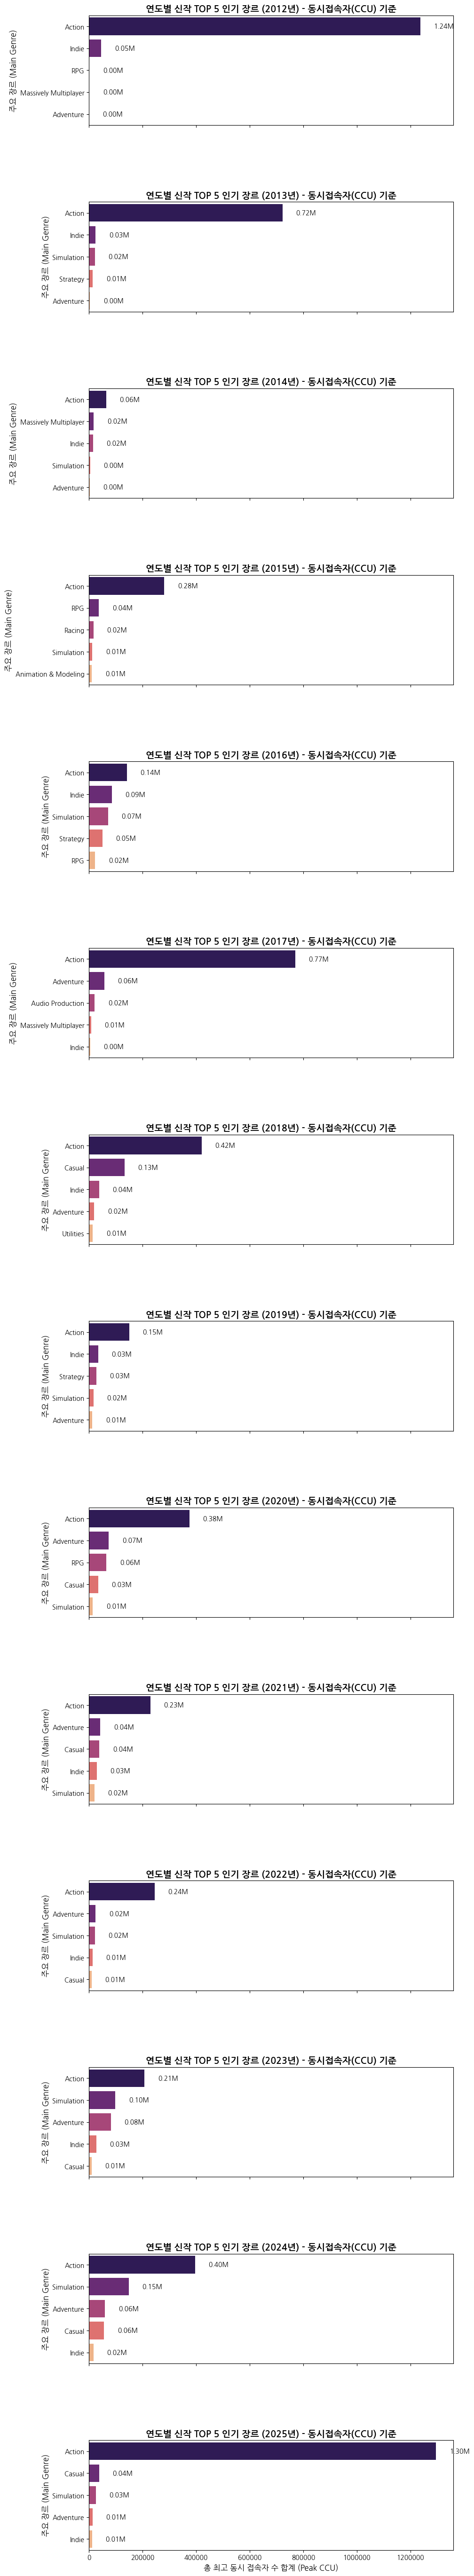

In [ ]:
# ----------------------------------------------------
# 4. 시각화 (막대 그래프) - peak_ccu 기준
# ----------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 시각화를 위한 준비
years = top_genres_yearly_ccu['year'].unique()
num_years = len(years)

# 서브플롯 설정
fig, axes = plt.subplots(nrows=num_years, ncols=1, figsize=(10, 5 * num_years), sharex=True)
plt.subplots_adjust(hspace=0.7)

# 각 연도별로 막대 그래프 그리기
for i, year in enumerate(years):
    data = top_genres_yearly_ccu[top_genres_yearly_ccu['year'] == year].sort_values(by='peak_ccu', ascending=False).reset_index(drop=True)

    sns.barplot(
        x='peak_ccu',
        y='main_genre',
        data=data,
        ax=axes[i],
        palette='magma' # 새로운 색상 팔레트
    )

    # 제목 및 축 레이블 설정
    axes[i].set_title(f'연도별 신작 TOP 5 인기 장르 ({year}년) - 동시접속자(CCU) 기준', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('총 최고 동시 접속자 수 합계 (Peak CCU)', fontsize=12)
    axes[i].set_ylabel('주요 장르 (Main Genre)', fontsize=12)

    # 그래프에 값 표시
    for j, row in data.iterrows():
        axes[i].text(
            row['peak_ccu'] + 50000,
            j,
            f'{row["peak_ccu"] / 1000000:.2f}M', # M(백만) 단위로 표시 (소수점 둘째 자리까지)
            va='center',
            fontsize=10
        )

    # x축 레이블이 겹칠 경우 대비
    axes[i].ticklabel_format(style='plain', axis='x')

plt.show()
print("")

연도별 TOP 3 최고 동시 접속자 신작 게임 목록

In [ ]:
import pandas as pd

# ----------------------------------------------------
# 1. 데이터 준비 (앞선 코드에서 이미 로드된 df를 사용합니다)
# ----------------------------------------------------

# 'year'와 'peak_ccu'를 정수형으로 변환 (안정성 확보)
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')
df['peak_ccu'] = pd.to_numeric(df['peak_ccu'], errors='coerce').astype('Int64')

# 필요한 열만 선택하고 유효한 데이터만 필터링
df_top_games = df[['year', 'name', 'main_genre', 'peak_ccu']].copy()
df_top_games.dropna(subset=['year', 'name', 'peak_ccu'], inplace=True)
df_top_games = df_top_games[df_top_games['peak_ccu'] > 0]
df_top_games = df_top_games[df_top_games['year'] >= 2012] # 분석 범위 제한

# ----------------------------------------------------
# 2. 연도별 TOP 3 게임 추출
# ----------------------------------------------------

# 각 연도별로 'peak_ccu'를 기준으로 내림차순 정렬
df_top_games_sorted = df_top_games.sort_values(by=['year', 'peak_ccu'], ascending=[True, False])

# 연도별로 상위 3개의 게임만 선택
top_3_games_yearly = df_top_games_sorted.groupby('year').head(3).reset_index(drop=True)

# 시각적으로 보기 좋게 포맷 변경 (CCU를 K/M 단위로 변환)
def format_ccu(ccu):
    if ccu >= 1000000:
        return f'{ccu / 1000000:.1f}M'
    elif ccu >= 1000:
        return f'{ccu / 1000:.0f}K'
    return str(ccu)

top_3_games_yearly['CCU (최고 동접)'] = top_3_games_yearly['peak_ccu'].apply(format_ccu)

# 최종 출력용 데이터프레임 정리
top_3_games_final = top_3_games_yearly[['year', 'name', 'CCU (최고 동접)', 'main_genre']]
top_3_games_final.rename(columns={'name': '게임명', 'year': '연도', 'main_genre': '주요 장르'}, inplace=True)

print("### 🏆 연도별 TOP 3 최고 동시 접속자 신작 게임 목록\n")
print(top_3_games_final.to_markdown(index=False)) # 마크다운 형식으로 보기 좋게 출력

### 🏆 연도별 TOP 3 최고 동시 접속자 신작 게임 목록

|   연도 | 게임명                                | CCU (최고 동접)   | 주요 장르             |
|-------:|:--------------------------------------|:------------------|:----------------------|
|   2012 | Counter-Strike 2                      | 1.2M              | Action                |
|   2012 | Euro Truck Simulator 2                | 44K               | Indie                 |
|   2012 | MapleStory                            | 6K                | Action                |
|   2013 | Dota 2                                | 556K              | Action                |
|   2013 | War Thunder                           | 52K               | Action                |
|   2013 | Warframe                              | 52K               | Action                |
|   2014 | The Binding of Isaac: Rebirth         | 24K               | Action                |
|   2014 | Geometry Dash                         | 17K               | Action                |
|   2014 | FINAL FANTASY XI

/tmp/ipython-input-1676764488.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_games_final.rename(columns={'name': '게임명', 'year': '연도', 'main_genre': '주요 장르'}, inplace=True)


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# (이전 코드에서 df 변수에 데이터가 로드되어 있고, 한글 폰트 설정이 완료되었다고 가정합니다)

# ----------------------------------------------------
# 1. 태그(Categories) 데이터 전처리 및 제외 목록 정의
# ----------------------------------------------------

# 'categories' 열의 대괄호를 제거하고 리스트 형태로 변환
df['categories_list'] = df['categories'].str.strip("[]").str.replace("'", "").str.split(', ')

# 분석에 필요한 열 선택 및 유효한 데이터 필터링
df_tag = df[['year', 'categories_list']].copy()
df_tag.dropna(subset=['year', 'categories_list'], inplace=True)
df_tag = df_tag[df_tag['year'] >= 2017].copy()

# 분석 의미가 적거나 너무 흔한 기능 태그 목록
common_tags_to_remove = [
    'Single-player', 'Family Sharing', 'Steam Achievements',
    'Steam Trading Cards', 'In-App Purchases', 'Stats',
    'Steam Cloud', 'Full controller support', 'Steam Workshop',
    'Captions available', 'Remote Play on Phone', 'Remote Play on Tablet',
    'Remote Play on TV', 'Steam Leaderboards', 'Partial Controller Support',
    'Tracked Controller Support', 'Remote Play Together', 'Shared/Split Screen' # 순위표도 일반 기능으로 간주하여 제외
]

# ----------------------------------------------------
# 2. 연도별 태그 빈도수 계산
# ----------------------------------------------------

# 모든 태그를 펼쳐서 (Unnest) 연도별로 집계
all_tags = df_tag.explode('categories_list')
tag_yearly_counts = all_tags.groupby(['year', 'categories_list']).size().reset_index(name='count')

# 제외 목록에 포함된 태그 제거
tag_yearly_counts = tag_yearly_counts[~tag_yearly_counts['categories_list'].isin(common_tags_to_remove)]

# 각 연도별 TOP 5 태그 추출 (트렌드 집중)
top_tags_yearly = tag_yearly_counts.sort_values(['year', 'count'], ascending=[True, False])
top_tags_yearly = top_tags_yearly.groupby('year').head(5).reset_index(drop=True)

print("### 📊 연도별 TOP 5 핵심 태그 데이터\n")
print(top_tags_yearly.head(15).to_markdown(index=False))

### 📊 연도별 TOP 5 핵심 태그 데이터

|   year | categories_list   |   count |
|-------:|:------------------|--------:|
|   2017 | Multi-player      |    1209 |
|   2017 | VR Only           |     946 |
|   2017 | PvP               |     931 |
|   2017 | Online PvP        |     652 |
|   2017 | Co-op             |     588 |
|   2018 | Multi-player      |    1446 |
|   2018 | PvP               |    1120 |
|   2018 | Online PvP        |     787 |
|   2018 | VR Only           |     757 |
|   2018 | Co-op             |     677 |
|   2019 | Multi-player      |    1162 |
|   2019 | PvP               |     902 |
|   2019 | Online PvP        |     589 |
|   2019 | Co-op             |     573 |
|   2019 | VR Only           |     488 |


/tmp/ipython-input-234089676.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-234089676.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-234089676.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-234089676.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-234089676.py:18: FutureWarning: 

Passing `pa

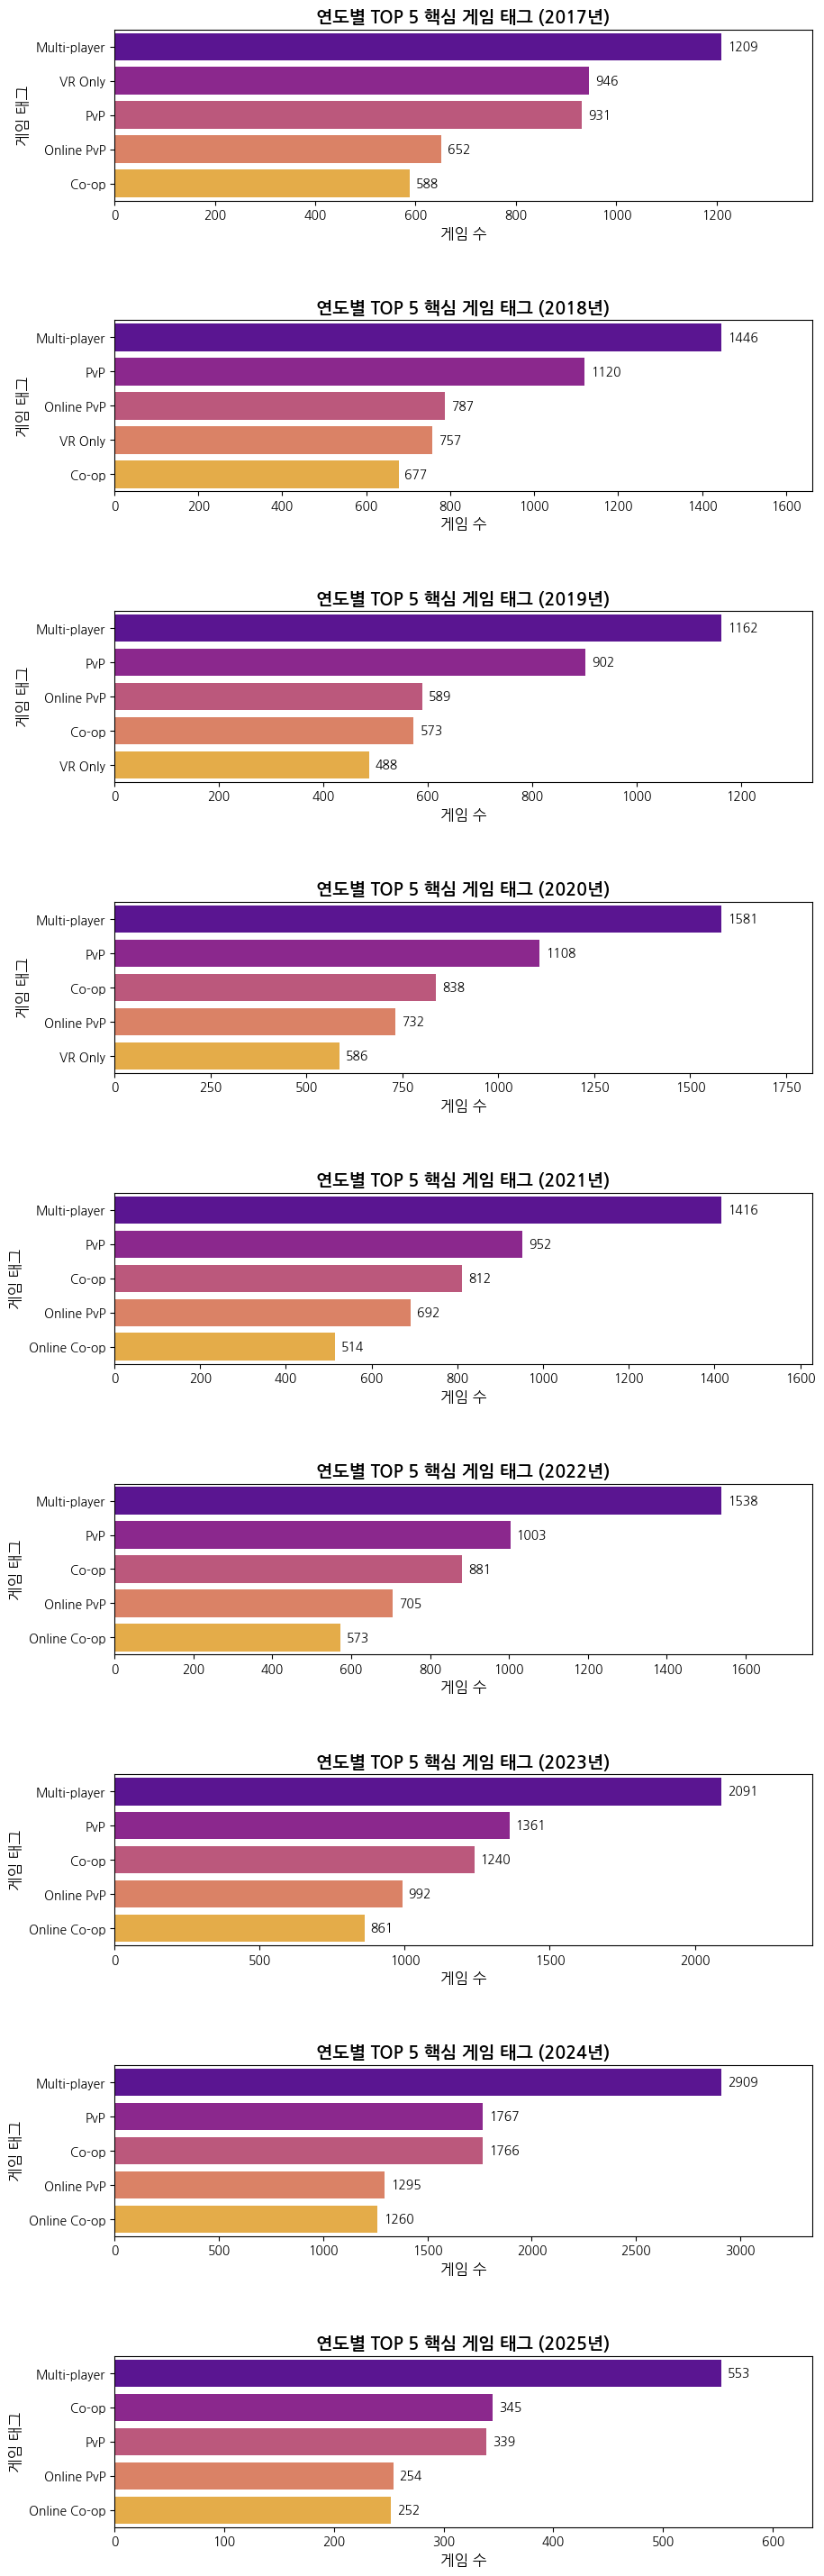

In [ ]:
# ----------------------------------------------------
# 3. 시각화 (태그 빈도) - 숫자 밀림 수정 완료
# ----------------------------------------------------

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

years = top_tags_yearly['year'].unique()
num_years = len(years)

fig, axes = plt.subplots(nrows=num_years, ncols=1, figsize=(10, 4 * num_years), sharex=False)
plt.subplots_adjust(hspace=0.7)

for i, year in enumerate(years):
    # reset_index를 사용하여 j가 y축 인덱스와 정확히 일치하도록 합니다.
    data = top_tags_yearly[top_tags_yearly['year'] == year].sort_values(by='count', ascending=False).reset_index(drop=True)

    sns.barplot(
        x='count',
        y='categories_list',
        data=data,
        ax=axes[i],
        palette='plasma'
    )

    axes[i].set_title(f'연도별 TOP 5 핵심 게임 태그 ({year}년)', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('게임 수', fontsize=12)
    axes[i].set_ylabel('게임 태그', fontsize=12)

    # 숫자 밀림 수정 부분: j 인덱스를 y좌표로 사용
    for j, row in data.iterrows():
        axes[i].text(
            row['count'] + (data['count'].max() * 0.01), # x좌표 (막대 끝에서 약간 오른쪽으로)
            j,                                          # y좌표 (막대 중앙)
            f'{row["count"]}',
            va='center',
            fontsize=10
        )

    # x축 경계를 데이터 최대값보다 약간 크게 설정하여 텍스트가 잘리지 않도록 함
    axes[i].set_xlim(0, data['count'].max() * 1.15)

plt.show()
print("")